🔍 Plates detected: 1
📸 Cropped plate 1:


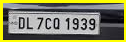

🖼️ Full Image with Detected Plates:


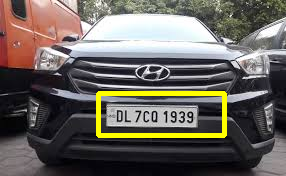

In [44]:
import cv2
from google.colab.patches import cv2_imshow
import os

# Load cascade
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# Image path
image_path = '/content/sample_data/a.jpg'

if not os.path.exists(image_path):
    print("❌ Image not found.")
else:
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect plates
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    print(f"🔍 Plates detected: {len(plates)}")

    for i, (x, y, w, h) in enumerate(plates):
        # Draw rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 3)

        # Crop and show the plate region
        plate_crop = image[y:y+h, x:x+w]
        print(f"📸 Cropped plate {i+1}:")
        cv2_imshow(plate_crop)

    if len(plates) == 0:
        cv2.putText(image, "No Plate Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

    # Show final image
    print("🖼️ Full Image with Detected Plates:")
    cv2_imshow(image)
